# Homework 3 - Optimization
For HW3, you will apply Submodular Set Function Optimization on a synthetic dataset.

***MAKE YOUR OWN COPY OF THIS FILE BEFORE YOU START.***

# Sections:
- **Synthetic Dataset**: Create and view a synthetic grid and sensor dataset.
- **Data Visualization**: Visualize synthetic dataset using MatplotLib.
- **Greedy Optimization**: Run greedy optimization on the synthetic dataset to determine optimal sensor placement given provided constraints.
- **Grid Coverage Visualization**: Visualize differences in grid coverage with different budget constraints.
- **Result Visualization**: Compare coverage of grid using optimal output vs. usage of all sensors.
- **Runtime Analysis**: Compare runtimes using different budget constraints.

## To-Do List
Complete each task and submit your Jupyter notebook on Blackboard.

Look out for sections marked "# IMPLEMENT" and "# QUESTION". For this homework, undergrad and masters students will complete all the same questions.
- 4 Implement Blocks + 2 Question Block = 6 Points Total

Partial credit can be earned.

In [ ]:
# Import Useful Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import math

## [1] Synthetic Dataset

In this section, we provide skeleton code that creates a synthetic dataset of senors and their various sizes.

In [ ]:
# Define Parameters of Synthetic Dataset
grid_dimension = 50   # Dimension of Square Grid where Sensors are Placed
n_sensors = 20        # Number of Sensors
np.random.seed(42)    # Set Random Seed

In [ ]:
# Create Synthetic Dataset of Sensors with Random Centers/Radii
def load_dataset(grid_dimension, n_sensors):
    IDs = list(range(n_sensors))              # Sensor Candidates
    df = pd.DataFrame(IDs, columns = ['ID'])
    df['cr'] = np.random.randint(1, grid_dimension//5, df.shape[0])   # Randomly Assign Radius to Each Circle
    df['cx'] = np.random.randint(1, grid_dimension-1, df.shape[0])    # Randomly Assign X Coordinate for Center of Circle
    df['cy'] = np.random.randint(1, grid_dimension-1, df.shape[0])    # Randomly Assign Y Coordinate for Center of Circle
    return df

df = load_dataset(grid_dimension, n_sensors)

# Preview Dataframe
print(df.shape)
df.head()

(20, 4)


,ID,cr,cx,cy
0,0,7,33,25
1,1,4,12,14
2,2,8,22,9
3,3,5,44,26
4,4,7,25,2


## [2] Data Visualization

When running the cell below, you can see a visualization of the sensor placments. Each circle represents a sensor and the area of the circle represents the grid points that sensor covers.

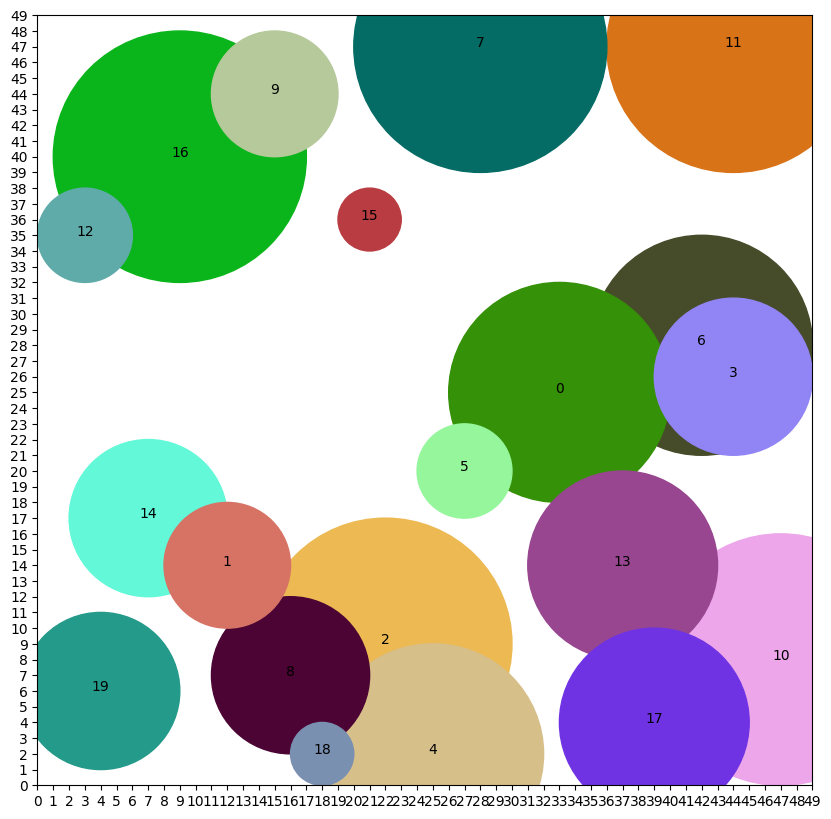

In [ ]:
# Sort Dataframe
df.sort_values(by='cr', ascending=False, inplace=True)    # Plots Larger Circles Beneath Smaller Ones

# Plot Circles/Sensors on Grid
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xticks(list(range(grid_dimension)))
ax.set_yticks(list(range(grid_dimension)))

# Give Circles/Sensors Distinct Color
colors = []
for i in range(df.shape[0]):
    colors.append((np.random.rand(), np.random.rand(), np.random.rand()))

for i,row in df.iterrows():
    c = plt.Circle((row['cx'], row['cy']), row['cr'], color=colors[row['ID']])
    ax.add_artist(c)
    ax.annotate(row['ID'], xy=(row['cx'], row['cy']), ha="center")

## [3] Greedy Optimization

In this section, implement four functions: `in_circle()`, `covered_pts()`, `F()`, and `greedy()`. Using your implementations, run greedy optimization on our synthetic dataset.

In [ ]:
'''

    Given grid point (x,y), a circle's center (cx, cy), and radius cr.

    Output:
    True if grid point (x,y) falls on or within that circle.

    def in_circle(x, y, cx, cy, cr):
        return

    -----------------------------------------------------------------------

    Given an nxn grid, circle's center (cx, cy), and radius cr.

    Output:
    A set of all grid points that the circle with center (cx, cy)
    and radius cr covers in a n by n grid.

    def covered_pts(n, cx, cy, cr):
        return

    -----------------------------------------------------------------------

    Example code for getting intersection between two sets.
    Think about how you can modify this to get union between two sets.

    aset = {1,3,5}
    bset = {1,2,6}
    inter = aset & bset

    -----------------------------------------------------------------------

    Given a set of circle IDs (S) and a new circle ID (c).

    Output:
    The union of points covered by S + c.

    def F(S, c, df, coveredset=None):
        return

    -----------------------------------------------------------------------

    Maximize coverage of grid points covered given a budget of k sensors.

    Start with an empty set. Determine best circle to add among unchosen circles,
    add to set and repeat k times for each k, keep track of how many total grid points
    are covered.

    Output:
    A pair of ordered list.
      - the first ordered list consists of the IDs of chosen circles/sensors at each iteration of greedy
      - the second ordered list consists of the corresponding number of covered grid points
        after choosing i circles/sensors

    def greedy(df, k):
        return

'''

# -------------------------------------------------------------------------
# IMPLEMENT - 1 Point
# -------------------------------------------------------------------------

def in_circle(x, y, cx, cy, cr):
  d = (x - cx) ** 2 + (y - cy) ** 2
  return d <= cr ** 2



def covered_pts(n, cx, cy, cr):
  points = set()
  for x in range(n):
      for y in range(n):
          if in_circle(x, y, cx, cy, cr):
              points.add((x, y))
  return points
      # return NotImplemented               # Replace NotImplemented with Correct Output


def F(S, c, df, coveredset=None):
  if coveredset is None:
      coveredset = set()
  for circle_id in S:
      row = df[df['ID'] == circle_id].iloc[0]
      coveredset.update(covered_pts(grid_dimension, row['cx'], row['cy'], row['cr']))
  c_row = df[df['ID'] == c].iloc[0]
  coveredset.update(covered_pts(grid_dimension, c_row['cx'], c_row['cy'], c_row['cr']))
  return coveredset

        # return NotImplemented               # Replace NotImplemented with Correct Output


def greedy(df, k):
    sensors_chosen, covered_points, covered_set = [],[], set()

    for i in range(k):
        max_increase = 0
        best_sensor = None

        for _, row in df.iterrows():
            if row['ID'] not in sensors_chosen:
                new_covered_set = F(sensors_chosen, row['ID'], df, covered_set.copy())
                increase = len(new_covered_set) - len(covered_set)
                if increase > max_increase:
                    max_increase = increase
                    best_sensor = row['ID']

        if best_sensor is not None:
            sensors_chosen.append(best_sensor)
            covered_set = F(sensors_chosen, best_sensor, df, covered_set)
            covered_points.append(len(covered_set))

    return sensors_chosen, covered_points

In [ ]:
# Run Greedy Optimization on Synthetic Data
k=10   # Set budget constraint on number of sensors we can place
df['gridpt_set'] = df.apply(lambda row: covered_pts(grid_dimension,row['cx'],row['cy'],row['cr']),axis=1)   # Column Containing Grid Points Covered by Each Circle/Sensor
result = greedy(df, k)  # Run Greedy Optimization (This should return a list of chosen circle IDs where len(result[0]) == k).

# Return Selected Outputs
print(result[0])  # Circle/Sensor IDs
print(result[1])  # Grid Points Covered (# Covered)

[2, 16, 6, 10, 7, 11, 0, 13, 14, 19]
[197, 394, 543, 680, 817, 938, 1057, 1153, 1234, 1314]


## [4] Grid Coverage Visualization

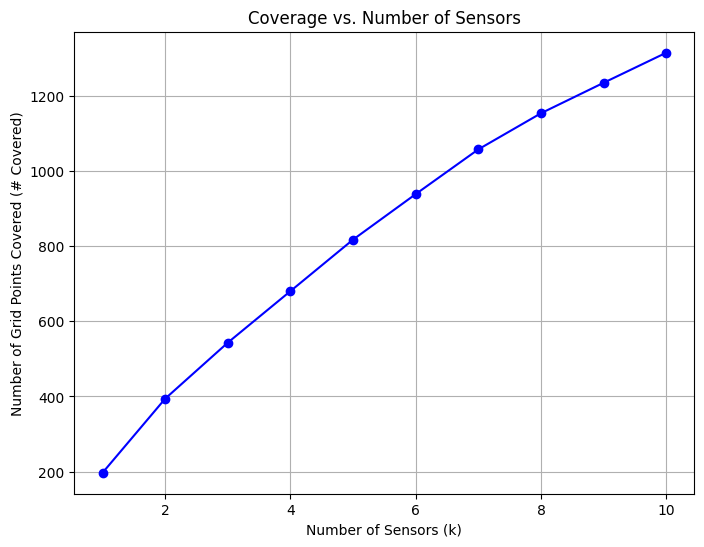

In [ ]:
'''
    Use your greedy results from Section 3.

    Show a line plot from 1 to k vs. the number of grid point covered (# Covered).

'''

# -------------------------------------------------------------------------
# IMPLEMENT - 1 Point
# -------------------------------------------------------------------------

k_values = list(range(1, k + 1))  # k should be defined based on your problem

chosen_sensors, covered_points_list = greedy(df, k)

# Create a line plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, covered_points_list, marker='o', linestyle='-', color='b')
plt.title('Coverage vs. Number of Sensors')
plt.xlabel('Number of Sensors (k)')
plt.ylabel('Number of Grid Points Covered (# Covered)')
plt.grid(True)
plt.show()

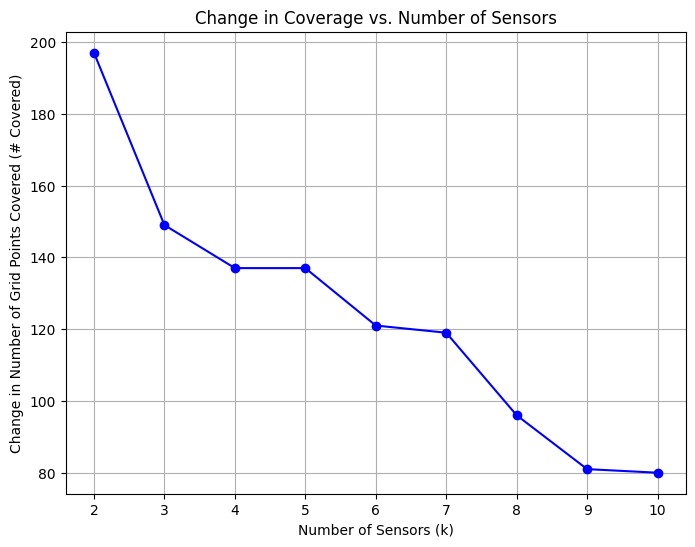

In [ ]:
'''

    Use your greedy results from Section 3.

    Show a line plot from 2 to k vs the change of number of grid point covered (# Covered).

    Hint: Consecutive difference between list elements.

'''

# -------------------------------------------------------------------------
# IMPLEMENT - 1 Point
# -------------------------------------------------------------------------
k_values = list(range(1, k + 1))  # k should be defined based on your problem

chosen_sensors, covered_points_list = greedy(df, k)

# Calculate the change in the number of covered grid points
change_in_coverage = [covered_points_list[i] - covered_points_list[i - 1] for i in range(1, k)]

# Create a line plot from 2 to k
plt.figure(figsize=(8, 6))
plt.plot(k_values[1:], change_in_coverage, marker='o', linestyle='-', color='b')
plt.title('Change in Coverage vs. Number of Sensors')
plt.xlabel('Number of Sensors (k)')
plt.ylabel('Change in Number of Grid Points Covered (# Covered)')
plt.grid(True)
plt.show()


In [ ]:
'''

Q: Use your output from the cell above.

   If we have a requirement to increase k as long as the incremental increase in
   the number of grid points covered (# Covered) is > 100, which k will we stop at?

'''

# -------------------------------------------------------------------------
# QUESTION - 1 Point
# -------------------------------------------------------------------------

print("We should stop increasing k at", 7,"to meet the requirement.")
# Your answer.


We should stop increasing k at 7 to meet the requirement.


## [5] Result Visualization

Let's compare the grid cover between the output of our greedy optimization algorithm (left) and all sensors (right) using different visualizations.

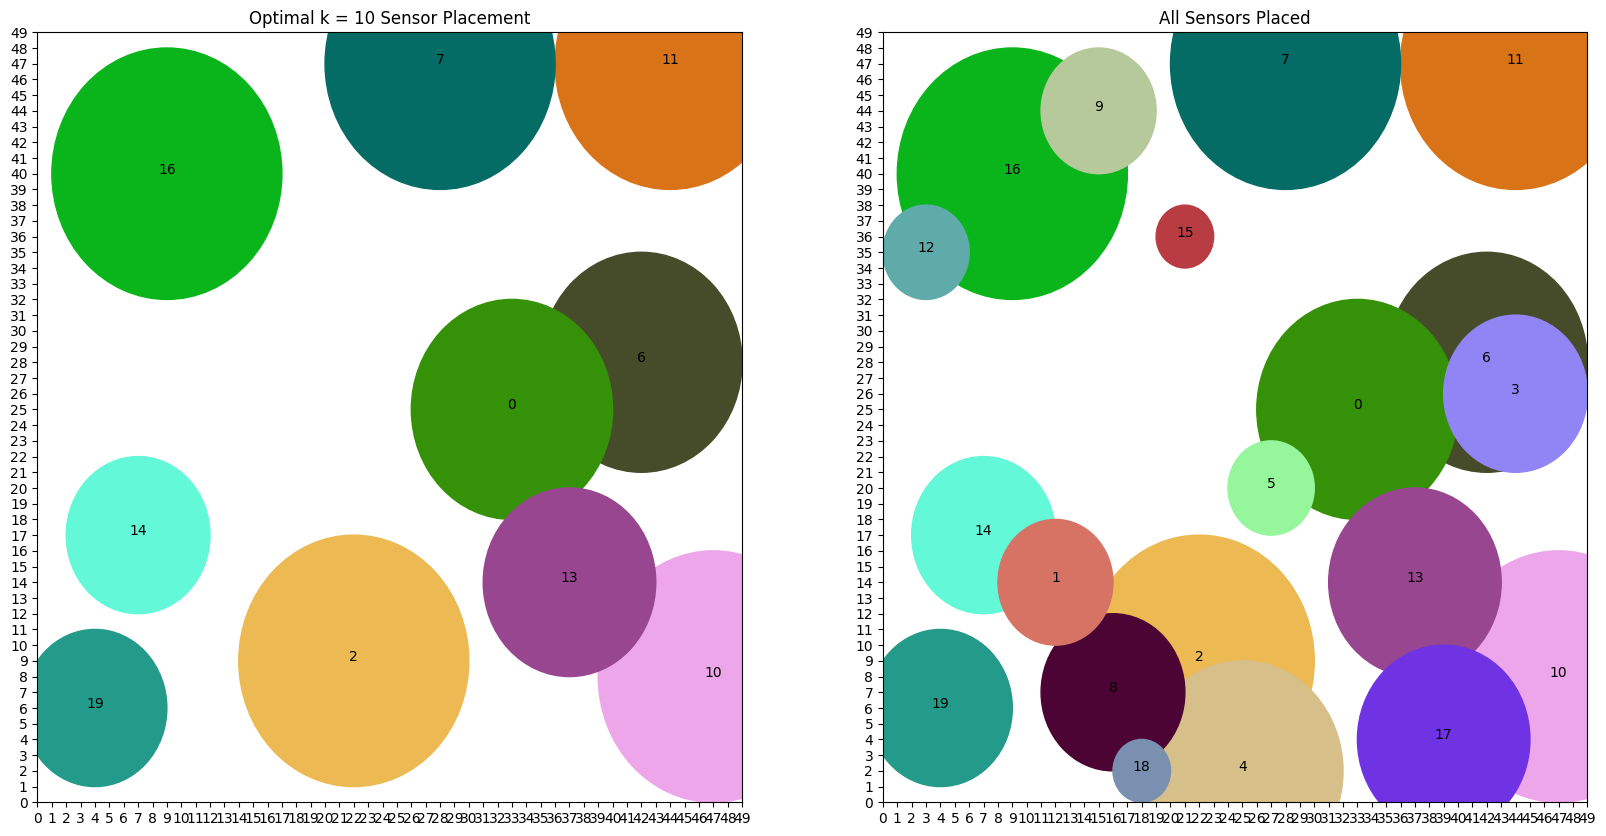

In [ ]:
# Create figure with two subplots to compare optimal sensor placement (left) and all sensors (right)
fig, ax = plt.subplots(ncols=2, figsize=(20,10))    # Note: Use plt.subplots, not plt.subplot

# Define Subplot Axis Ticks
ax[0].set_xticks(list(range(grid_dimension)))
ax[0].set_yticks(list(range(grid_dimension)))
ax[1].set_xticks(list(range(grid_dimension)))
ax[1].set_yticks(list(range(grid_dimension)))

# Set Subplot Titles
b = 10
sensors10 = result[0][:b]
ax[0].set_title('Optimal k = ' + str(b)+ ' Sensor Placement')
ax[1].set_title('All Sensors Placed')

# Define Circle/Sensor Colors
for i,row in df.iterrows():
    c = plt.Circle((row['cx'], row['cy']), row['cr'], color=colors[row['ID']])
    if row['ID'] in sensors10:
        ax[0].add_artist(c)
        ax[0].annotate(row['ID'], xy=(row['cx'], row['cy']), ha="center")
    c = plt.Circle((row['cx'], row['cy']), row['cr'], color=colors[row['ID']])
    ax[1].add_artist(c)
    ax[1].annotate(row['ID'], xy=(row['cx'], row['cy']), ha="center")

## [6] Runtime Analysis

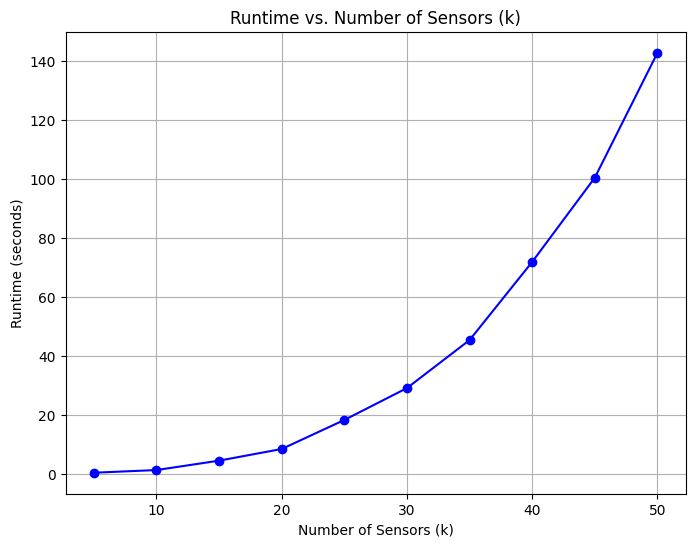

In [ ]:
'''

    Re-run greedy optimization.

    Get runtimes for each i in k_arr (for each i, consider n_sensors == k == k_arr[i]).

    Show a line plot - k vs. runtime (sec).

    Hint:
    Use time.time() .

'''

# -------------------------------------------------------------------------
# IMPLEMENT - 1 Point
# -------------------------------------------------------------------------

grid_dimension = 100
k_arr = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
runtimes = []  # Store the runtimes

for k in k_arr:
    start_time = time.time()
    df = load_dataset(grid_dimension,k)
    chosen_sensors, _ = greedy(df, k)
    end_time = time.time()
    runtime = end_time - start_time
    runtimes.append(runtime)

# Create a line plot
plt.figure(figsize=(8, 6))
plt.plot(k_arr, runtimes, marker='o', linestyle='-', color='b')
plt.title('Runtime vs. Number of Sensors (k)')
plt.xlabel('Number of Sensors (k)')
plt.ylabel('Runtime (seconds)')
plt.grid(True)

In [ ]:
'''

Q: If we increase grid_dimension from 100 to 500, how much will runtimes increase?

'''

# -------------------------------------------------------------------------
# QUESTION - 1 Point
# -------------------------------------------------------------------------

# Your answer.

# Based on the above graph, the relationship between the number of sensors(k) and runtime is not linear, which means that it's difficult to provide a precise estimate for how the runtime will change if the grid dimension increases from 100 to 500 solely based on this graph.

# The area (number of grid points) increases by a factor of 500/ 100 = 5.
# Thus, the greedy algorithm examines each grid point for each sensor, and the complexity is also dependent on other factors like how the optimization is implemented, the spatial distribution of the data and other factors.
# Therefore, runtime complexity to increase roughly proportionally with the number of grid points.

'\n\nQ: If we increase grid_dimension from 100 to 500, how much will runtimes increase?\n\n'